In [ ]:
# data processing
import pandas as pd
# linear algebra
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#scaling
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
#!pip install scikit-plot
import scikitplot as skplt
import pickle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data

In [ ]:
df1 = pd.read_csv("Bangalore_UsedCars2.csv")
df1.head()

,Unnamed: 0,Car_Name,Car_details,Endine_disp,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Gross_Weight,top_speed,Ownership,Year_of_Manufacture,Steering_Type,Car_price
0,0,2020 MG Hector Sharp DCT,"12,870 kms • Petrol • Automatic",1451,13.96,5.0,Black,141,Disc,Disc,587,1760,1835,4655,-,-,Second Owner,2020,-,₹ 16.45 Lakh
1,1,2021 Renault Kiger RXZ,"12,109 kms • Petrol • Manual",999,19.17,5.0,Silver,71.01,Disc,Drum,405,1605,1750,3991,-,-,First Owner,2021,Electric,₹ 8.39 Lakh
2,2,2013 Maruti Swift VXI,"31,639 kms • Petrol • Manual",1197,18.6,5.0,Grey,85.8,Ventilated Disc,Drum,232-litres,1530,1695,3850,1415,160km/hr,First Owner,2013,Power,₹ 4.97 Lakh
3,3,2018 Renault Duster 110PS Diesel RxS AMT,"41,320 kms • Diesel • Automatic",1461,19.87,5.0,Grey,108.45,Disc,Drum,475-litres,1695,1822,4315,1777,168 Kmph,First Owner,2018,Power,₹ 9.48 Lakh
4,4,2017 Hyundai Grand i10 1.2 Kappa Sportz BSIV,"26,240 kms • Petrol • Manual",1197,18.9,5.0,Silver,81.86,Disc,Drum,256,1520,1660,3765,-,165 Kmph,First Owner,2017,Power,₹ 5.35 Lakh


In [4]:
df2 = pd.read_csv("Bangalore_UsedCars.csv")
df2.head(10)

,Unnamed: 0,Car_Name,Car_details,Endine_disp,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Gross_Weight,top_speed,Ownership,Year_of_Manufacture,Steering_Type,Car_price
0,0,2021 Skoda Kushaq 1.0 TSI Style,"14,710 kms • Petrol • Manual",999,19.2,5,Grey,113.98,Disc,Drum,385/1405,1612,1760,4225,1640,-,First Owner,2021,Electric,₹ 15.99 Lakh
1,1,2020 Kia Seltos HTK Diesel,"37,166 kms • Diesel • Manual",1493,20.8,5,Maroon,113.43,Disc,Disc,433,1645,1800,4315,-,-,First Owner,2020,Electric,₹ 13.05 Lakh
2,2,2022 Mahindra Bolero Neo N10,"26,191 kms • Diesel • Manual",1493,17.29,7,White,100,Disc,Drum,384,1817,1795,3995,2215,-,First Owner,2022,Power,₹ 11.84 Lakh
3,3,2017 Maruti Baleno 1.2 Delta,"19,898 kms • Petrol • Manual",1197,21.4,5,Orange,83.1,Disc,Drum,339-litres,1510,1745,3995,1340,180 Kmph,Second Owner,2017,Power,₹ 6.05 Lakh
4,4,2020 Hyundai Creta SX Turbo Dualtone,"18,182 kms • Petrol • Automatic",1353,16.8,5,White,138.08,Disc,Disc,433,1635,1790,4300,-,-,First Owner,2020,Power,₹ 17.99 Lakh
5,5,2018 Maruti Swift VXI,"30,269 kms • Petrol • Manual",1197,21.21,5,Silver,81.80,Disc,Drum,268,1530,1735,3840,1315,-,First Owner,2018,Electric,₹ 6.45 Lakh
6,6,2019 Renault KWID 1.0 RXT AMT Opt BSIV,"9,668 kms • Petrol • Automatic",999,24.04,5,White,67,Disc,Drum,279,1478,1579,3731,-,-,First Owner,2019,Power,₹ 5.12 Lakh
7,7,2021 Renault Kiger RXZ,"5,198 kms • Petrol • Manual",999,19.17,5,Blue,71.01,Disc,Drum,405,1605,1750,3991,-,-,First Owner,2021,Electric,₹ 8.33 Lakh
8,8,2019 Mercedes-Benz GLC 220d 4MATIC,"19,396 kms • Diesel • Automatic",1950,-,5,White,194,Disc,Disc,550-litres,1644,1890,4658,2500,215 kmph,First Owner,2019,Power,₹ 51.95 Lakh
9,9,2021 Renault Kiger RXZ Turbo CVT DT,"14,475 kms • Petrol • Automatic",999,18.24,5,Blue,98.63,Disc,Drum,405,1605,1750,3991,-,-,First Owner,2021,Electric,₹ 10.08 Lakh


In [5]:
df = pd.concat([df1,df2],ignore_index=True)

In [6]:
df.shape

(1536, 20)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1536 non-null   int64 
 1   Car_Name             1536 non-null   object
 2   Car_details          1536 non-null   object
 3   Endine_disp          1536 non-null   object
 4   Milage_in_km/ltr     1536 non-null   object
 5   Seating_cap          1535 non-null   object
 6   color                1535 non-null   object
 7   Max_power            1536 non-null   object
 8   front_brake_type     1536 non-null   object
 9   rear_brake_type      1536 non-null   object
 10  cargo_volume         1535 non-null   object
 11  height               1532 non-null   object
 12  width                1532 non-null   object
 13  length               1532 non-null   object
 14  Gross_Weight         1533 non-null   object
 15  top_speed            1534 non-null   object
 16  Owners

In [9]:
df = df.replace('-', np.nan)

In [10]:
df

,Unnamed: 0,Car_Name,Car_details,Endine_disp,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Gross_Weight,top_speed,Ownership,Year_of_Manufacture,Steering_Type,Car_price
0,0,2020 MG Hector Sharp DCT,"12,870 kms • Petrol • Automatic",1451,13.96,5.0,Black,141,Disc,Disc,587,1760,1835,4655,NaN,NaN,Second Owner,2020,NaN,₹ 16.45 Lakh
1,1,2021 Renault Kiger RXZ,"12,109 kms • Petrol • Manual",999,19.17,5.0,Silver,71.01,Disc,Drum,405,1605,1750,3991,NaN,NaN,First Owner,2021,Electric,₹ 8.39 Lakh
2,2,2013 Maruti Swift VXI,"31,639 kms • Petrol • Manual",1197,18.6,5.0,Grey,85.8,Ventilated Disc,Drum,232-litres,1530,1695,3850,1415,160km/hr,First Owner,2013,Power,₹ 4.97 Lakh
3,3,2018 Renault Duster 110PS Diesel RxS AMT,"41,320 kms • Diesel • Automatic",1461,19.87,5.0,Grey,108.45,Disc,Drum,475-litres,1695,1822,4315,1777,168 Kmph,First Owner,2018,Power,₹ 9.48 Lakh
4,4,2017 Hyundai Grand i10 1.2 Kappa Sportz BSIV,"26,240 kms • Petrol • Manual",1197,18.9,5.0,Silver,81.86,Disc,Drum,256,1520,1660,3765,NaN,165 Kmph,First Owner,2017,Power,₹ 5.35 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,1275,2017 Hyundai i20 Active 1.2 S,"42,000 kms • Petrol • Manual",1197,17.19,5,White,81.86,Disc,Drum,285-litres,1555,1760,3995,NaN,160 Kmph,First Owner,2017,Power,₹ 6.95 Lakh
1532,1276,2019 Renault KWID RXT BSIV,"60,685 kms • Petrol • Manual",799,25.17,5,White,53.3,Disc,Drum,279,1474,1579,3731,NaN,NaN,First Owner,2019,Power,₹ 4.70 Lakh
1533,1277,2015 Hyundai Santa Fe 2WD AT,"1,59,212 kms • Diesel • Automatic",2199,13.01,7,White,194.3,Ventilated Disc,Solid Disc,382-litres,1690,1880,4690,NaN,182 Kmph,First Owner,2015,Power,₹ 10.75 Lakh
1534,1278,2018 Volkswagen Tiguan 2.0 TDI Highline,"67,000 kms • Diesel • Automatic",1968,16.65,5,White,141,Disc,Disc,615,1672,1839,4486,2250,NaN,First Owner,2018,Electric,₹ 28.45 Lakh


In [11]:
df.isna().sum()

Unnamed: 0               0
Car_Name                 0
Car_details              0
Endine_disp              5
Milage_in_km/ltr        38
Seating_cap              3
color                    6
Max_power               15
front_brake_type        15
rear_brake_type         15
cargo_volume           237
height                  20
width                   20
length                  20
Gross_Weight           802
top_speed              670
Ownership                2
Year_of_Manufacture      4
Steering_Type           33
Car_price                0
dtype: int64

In [12]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [13]:
df.columns

Index(['Car_Name', 'Car_details', 'Endine_disp', 'Milage_in_km/ltr',
       'Seating_cap', 'color', 'Max_power', 'front_brake_type',
       'rear_brake_type', 'cargo_volume', 'height', 'width', 'length',
       'Gross_Weight', 'top_speed', 'Ownership', 'Year_of_Manufacture',
       'Steering_Type', 'Car_price'],
      dtype='object')

In [14]:
df['car_names'] = df['Car_Name'].str[4:]
df['car_names'].head()

0                         MG Hector Sharp DCT
1                           Renault Kiger RXZ
2                            Maruti Swift VXI
3         Renault Duster 110PS Diesel RxS AMT
4     Hyundai Grand i10 1.2 Kappa Sportz BSIV
Name: car_names, dtype: object

In [15]:
df['Brand'] = df.car_names.str.split(' ').str.get(1)
df['Model'] = df.car_names.str.split(' ').str[2:]

In [16]:
#df['Model'].value_counts()
df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model'] = df['Model'].apply(lambda x: x.lower().replace(',',' '))
df['Model'].value_counts()

swift vxi                        35
wagon r vxi bs iv                16
tiago 1.2 revotron xz            14
city i vtec v                    13
ritz vxi                         12
                                 ..
grand i10 nios sportz crdi        1
octavia style plus 1.8 tsi at     1
baleno alpha                      1
venue s turbo dct                 1
santa fe 2wd at                   1
Name: Model, Length: 805, dtype: int64

In [17]:
df['Brand'] = df['Brand'].apply(lambda x: x.lower().replace(',',' '))


In [18]:
df['Car_price'].head()

0    ₹ 16.45 Lakh
1     ₹ 8.39 Lakh
2     ₹ 4.97 Lakh
3     ₹ 9.48 Lakh
4     ₹ 5.35 Lakh
Name: Car_price, dtype: object

In [19]:
#df['x'] = df['Car_price'].str.split('').str.get(1)


In [20]:
df['Car_price'] = df['Car_price'].str.replace('₹ ','')
df['x'] = df['Car_price'].str.split(' ').str.get(1)
df['Car_price'] = df['Car_price'].str.replace(',','').str.replace(' Lakh','')
df['Car_price'] = df['Car_price'].astype(float)


In [21]:
df['x']

0       Lakh
1       Lakh
2       Lakh
3       Lakh
4       Lakh
        ... 
1531    Lakh
1532    Lakh
1533    Lakh
1534    Lakh
1535    Lakh
Name: x, Length: 1536, dtype: object

In [22]:
df['x'] = df['x'].str.replace('Lakh','100000')
df['x'] = df['x'].replace(np.nan,1)
df['x'] = df['x'].astype(float)

In [23]:
df['Car_price'] = df['Car_price']*df['x']

In [24]:
df['Car_price']

0       1645000.0
1        839000.0
2        497000.0
3        948000.0
4        535000.0
          ...    
1531     695000.0
1532     470000.0
1533    1075000.0
1534    2845000.0
1535     845000.0
Name: Car_price, Length: 1536, dtype: float64

In [25]:
df['Car_details']

0         12,870 kms • Petrol • Automatic
1            12,109 kms • Petrol • Manual
2            31,639 kms • Petrol • Manual
3         41,320 kms • Diesel • Automatic
4            26,240 kms • Petrol • Manual
                      ...                
1531         42,000 kms • Petrol • Manual
1532         60,685 kms • Petrol • Manual
1533    1,59,212 kms • Diesel • Automatic
1534      67,000 kms • Diesel • Automatic
1535         43,082 kms • Petrol • Manual
Name: Car_details, Length: 1536, dtype: object

In [26]:
df['Running_kms'] = df['Car_details'].str.split('•').str.get(0)


In [27]:
df['Fuel_type'] = df['Car_details'].str.split('•').str.get(1)
df['Gear_Transmission'] = df['Car_details'].str.split('•').str.get(2)


In [28]:
df['Fuel_type'].value_counts()

 Petrol       1089
 Diesel        434
 CNG             8
 Electric        4
 LPG             1
Name: Fuel_type, dtype: int64

In [29]:
df['Gear_Transmission'].value_counts()

 Manual       1013
 Automatic     523
Name: Gear_Transmission, dtype: int64

In [30]:
df['Endine_disp'] = df['Endine_disp'].astype(float)
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace(' km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype(float)

In [31]:
df.Seating_cap.value_counts()

5      1134
5.0     230
7       109
4        20
7.0      19
6         9
8         6
6.0       4
2.0       1
8.0       1
Name: Seating_cap, dtype: int64

In [32]:
df['Max_power'] = df['Max_power'].str.split(' ').str.get(0)
df['Max_power'] = df['Max_power'].str.split('(').str.get(0)
df['Max_power'] = df['Max_power'].str.replace('PS','').str.replace('ps','')
df['Max_power'] = df['Max_power'].str.replace('843750rpm','84')
df['Max_power'] = df['Max_power'].astype(float)

In [33]:
df.columns

Index(['Car_Name', 'Car_details', 'Endine_disp', 'Milage_in_km/ltr',
       'Seating_cap', 'color', 'Max_power', 'front_brake_type',
       'rear_brake_type', 'cargo_volume', 'height', 'width', 'length',
       'Gross_Weight', 'top_speed', 'Ownership', 'Year_of_Manufacture',
       'Steering_Type', 'Car_price', 'car_names', 'Brand', 'Model', 'x',
       'Running_kms', 'Fuel_type', 'Gear_Transmission'],
      dtype='object')

In [34]:
print('Value count for front_brake_type ')
print(df.front_brake_type.value_counts())

print('Value count for rear_brake_type ')
print(df.rear_brake_type.value_counts())

Value count for front_brake_type 
Disc                                          1016
Ventilated Disc                                466
Disc & Caliper Type                              7
Solid Disc                                       7
Ventilated Discs                                 6
Ventilated discs                                 5
Disk                                             3
Ventilated DIsc                                  3
Multilateral Disc                                1
264mm Ventilated discs                           1
Single Piston Sliding Caliper, Vented Disc       1
solid disc                                       1
disc                                             1
Vantilated Disc                                  1
Disc, 236 mm                                     1
Ventilated Disk                                  1
Name: front_brake_type, dtype: int64
Value count for rear_brake_type 
Drum                                          1195
Disc                         

In [35]:
df['front_brake_type'] = df['front_brake_type'].replace(['Ventilated Discs','Ventilated discs','Ventilated DIsc',
                                                             '264mm Ventilated discs','Single Piston Sliding Caliper, Vented Disc',
                                                             'Vantilated Disc','Ventilated Disk'],'Ventilated Disc')
df['front_brake_type'] = df['front_brake_type'].replace(['Solid Disc','Disk','solid disc','disc','Disc, 236 mm'],'Disc')


In [36]:
df['rear_brake_type'] = df['rear_brake_type'].replace(['drum','Drums 180 mm','Leading & Trailing Drum'],'Drum')
df['rear_brake_type'] = df['rear_brake_type'].replace(['Ventilated discs','Ventilated Discs','Single Piston Sliding Caliper, Vented Disc'],'Ventilated Disc')
df['rear_brake_type'] = df['rear_brake_type'].replace(['Solid Disc','Disc & Caliper Type','Discs','solid disc'],'Disc')
df['rear_brake_type'] = df['rear_brake_type'].replace(['Ventilated Drum In Discs'],'Ventilated Drum')


In [37]:
df['cargo_volume'] = df['cargo_volume'].str.replace('-litres','').str.replace('385/1405','385').str.replace(' liters','').str.replace('-liters','').str.replace('425-','425')
df['cargo_volume'] = df['cargo_volume'].str.replace(' L','').str.replace(' litres','').str.replace('-Liters','').str.replace('itres','').str.replace('it','').str.replace('ers','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-lre','').str.replace('-Ler','').str.replace('l','').str.replace(' - 680','').str.replace('re','').str.replace('L','')
df['cargo_volume'] = df['cargo_volume'].astype(float)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car_Name             1536 non-null   object 
 1   Car_details          1536 non-null   object 
 2   Endine_disp          1531 non-null   float64
 3   Milage_in_km/ltr     1498 non-null   float64
 4   Seating_cap          1533 non-null   object 
 5   color                1530 non-null   object 
 6   Max_power            1521 non-null   float64
 7   front_brake_type     1521 non-null   object 
 8   rear_brake_type      1521 non-null   object 
 9   cargo_volume         1299 non-null   float64
 10  height               1516 non-null   object 
 11  width                1516 non-null   object 
 12  length               1516 non-null   object 
 13  Gross_Weight         734 non-null    object 
 14  top_speed            866 non-null    object 
 15  Ownership            1534 non-null   o

In [39]:
#Changing data types of height,width,length & Seating_cap
cols = ['height','width','length','Seating_cap']
for i in cols:
    df[i] = df[i].str.replace(',','')
    df[i] = df[i].str[:4]
    df[i] = df[i].astype('float')

In [40]:
#getting numerical values from Weight column
df['Gross_Weight'] = df['Gross_Weight'].str.replace(',','').str[0:4]
df.Gross_Weight = df.Gross_Weight.astype('float')

In [41]:
#getting numerical values from top_speed column
df['top_speed'] = df['top_speed'].str[0:3]
df.top_speed = df.top_speed.astype('float')

In [42]:
df.Year_of_Manufacture = df.Year_of_Manufacture.astype('float')
df['Car_age'] = 2023 - df['Year_of_Manufacture']
df.drop(columns = 'Year_of_Manufacture', inplace = True)

In [43]:
df['Running_kms'] = df['Running_kms'].str.replace('kms','').str.replace(',','')
df['Running_kms'] = df['Running_kms'].astype('float')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Name           1536 non-null   object 
 1   Car_details        1536 non-null   object 
 2   Endine_disp        1531 non-null   float64
 3   Milage_in_km/ltr   1498 non-null   float64
 4   Seating_cap        1278 non-null   float64
 5   color              1530 non-null   object 
 6   Max_power          1521 non-null   float64
 7   front_brake_type   1521 non-null   object 
 8   rear_brake_type    1521 non-null   object 
 9   cargo_volume       1299 non-null   float64
 10  height             1516 non-null   float64
 11  width              1516 non-null   float64
 12  length             1516 non-null   float64
 13  Gross_Weight       734 non-null    float64
 14  top_speed          866 non-null    float64
 15  Ownership          1534 non-null   object 
 16  Steering_Type      1503 

In [45]:
df.head()

,Car_Name,Car_details,Endine_disp,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,...,Steering_Type,Car_price,car_names,Brand,Model,x,Running_kms,Fuel_type,Gear_Transmission,Car_age
0,2020 MG Hector Sharp DCT,"12,870 kms • Petrol • Automatic",1451.0,13.96,NaN,Black,141.00,Disc,Disc,587.0,...,NaN,1645000.0,MG Hector Sharp DCT,mg,hector sharp dct,100000.0,12870.0,Petrol,Automatic,3.0
1,2021 Renault Kiger RXZ,"12,109 kms • Petrol • Manual",999.0,19.17,NaN,Silver,71.01,Disc,Drum,405.0,...,Electric,839000.0,Renault Kiger RXZ,renault,kiger rxz,100000.0,12109.0,Petrol,Manual,2.0
2,2013 Maruti Swift VXI,"31,639 kms • Petrol • Manual",1197.0,18.60,NaN,Grey,85.80,Ventilated Disc,Drum,232.0,...,Power,497000.0,Maruti Swift VXI,maruti,swift vxi,100000.0,31639.0,Petrol,Manual,10.0
3,2018 Renault Duster 110PS Diesel RxS AMT,"41,320 kms • Diesel • Automatic",1461.0,19.87,NaN,Grey,108.45,Disc,Drum,475.0,...,Power,948000.0,Renault Duster 110PS Diesel RxS AMT,renault,duster 110ps diesel rxs amt,100000.0,41320.0,Diesel,Automatic,5.0
4,2017 Hyundai Grand i10 1.2 Kappa Sportz BSIV,"26,240 kms • Petrol • Manual",1197.0,18.90,NaN,Silver,81.86,Disc,Drum,256.0,...,Power,535000.0,Hyundai Grand i10 1.2 Kappa Sportz BSIV,hyundai,grand i10 1.2 kappa sportz bsiv,100000.0,26240.0,Petrol,Manual,6.0


In [46]:
#drop unwanted columns
df.drop(columns=['Car_Name','Car_details','car_names','x'],inplace=True)

In [47]:
df.columns

Index(['Endine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'color', 'Max_power',
       'front_brake_type', 'rear_brake_type', 'cargo_volume', 'height',
       'width', 'length', 'Gross_Weight', 'top_speed', 'Ownership',
       'Steering_Type', 'Car_price', 'Brand', 'Model', 'Running_kms',
       'Fuel_type', 'Gear_Transmission', 'Car_age'],
      dtype='object')

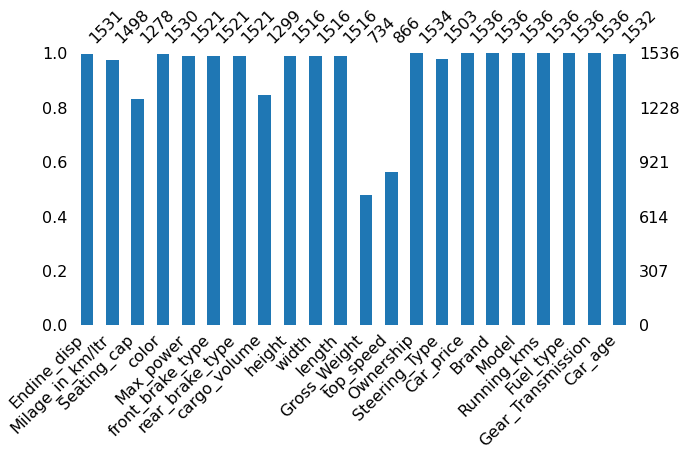

In [48]:
missingno.bar(df, figsize = (10,5), color="tab:blue")
plt.show()

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Endine_disp,1531.0,1.425524e+03,438.074815,0.0,1197.000,1248.00,1498.00,4367.0
Milage_in_km/ltr,1498.0,1.889069e+01,4.059650,9.0,16.985,18.60,21.00,110.0
Seating_cap,1278.0,5.176056e+00,0.612700,4.0,5.000,5.00,5.00,8.0
Max_power,1521.0,1.060823e+02,39.917492,25.4,81.830,94.68,120.33,443.8
cargo_volume,1299.0,3.679500e+02,123.077373,84.0,268.000,350.00,465.00,981.0
height,1516.0,1.577651e+03,106.481323,1295.0,1500.000,1535.00,1643.00,1995.0
width,1516.0,1.739065e+03,109.706183,1410.0,1694.000,1735.00,1800.00,2220.0
length,1516.0,4.121058e+03,366.301334,3335.0,3840.000,3995.00,4420.00,5265.0
Gross_Weight,734.0,1.685948e+03,419.269963,1000.0,1350.000,1580.00,1804.50,3250.0
top_speed,866.0,1.748199e+02,25.302468,80.0,158.000,170.00,185.00,281.0


In [50]:

cols = ['Endine_disp','Milage_in_km/ltr','Max_power','cargo_volume','Endine_disp','height','width','length','Gross_Weight','top_speed']
for col in cols:
    median = df[col].median()
    df[col] = df[col].fillna(median)
    
cat_cols = ['Seating_cap','color','front_brake_type','rear_brake_type','Ownership','Steering_Type','Car_age']
for col in cat_cols:
    mode = df[col].mode()[0]  # get the first mode if there are multiple modes
    df[col] = df[col].fillna(mode)

In [51]:
df.isna().sum()

Endine_disp          0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
cargo_volume         0
height               0
width                0
length               0
Gross_Weight         0
top_speed            0
Ownership            0
Steering_Type        0
Car_price            0
Brand                0
Model                0
Running_kms          0
Fuel_type            0
Gear_Transmission    0
Car_age              0
dtype: int64

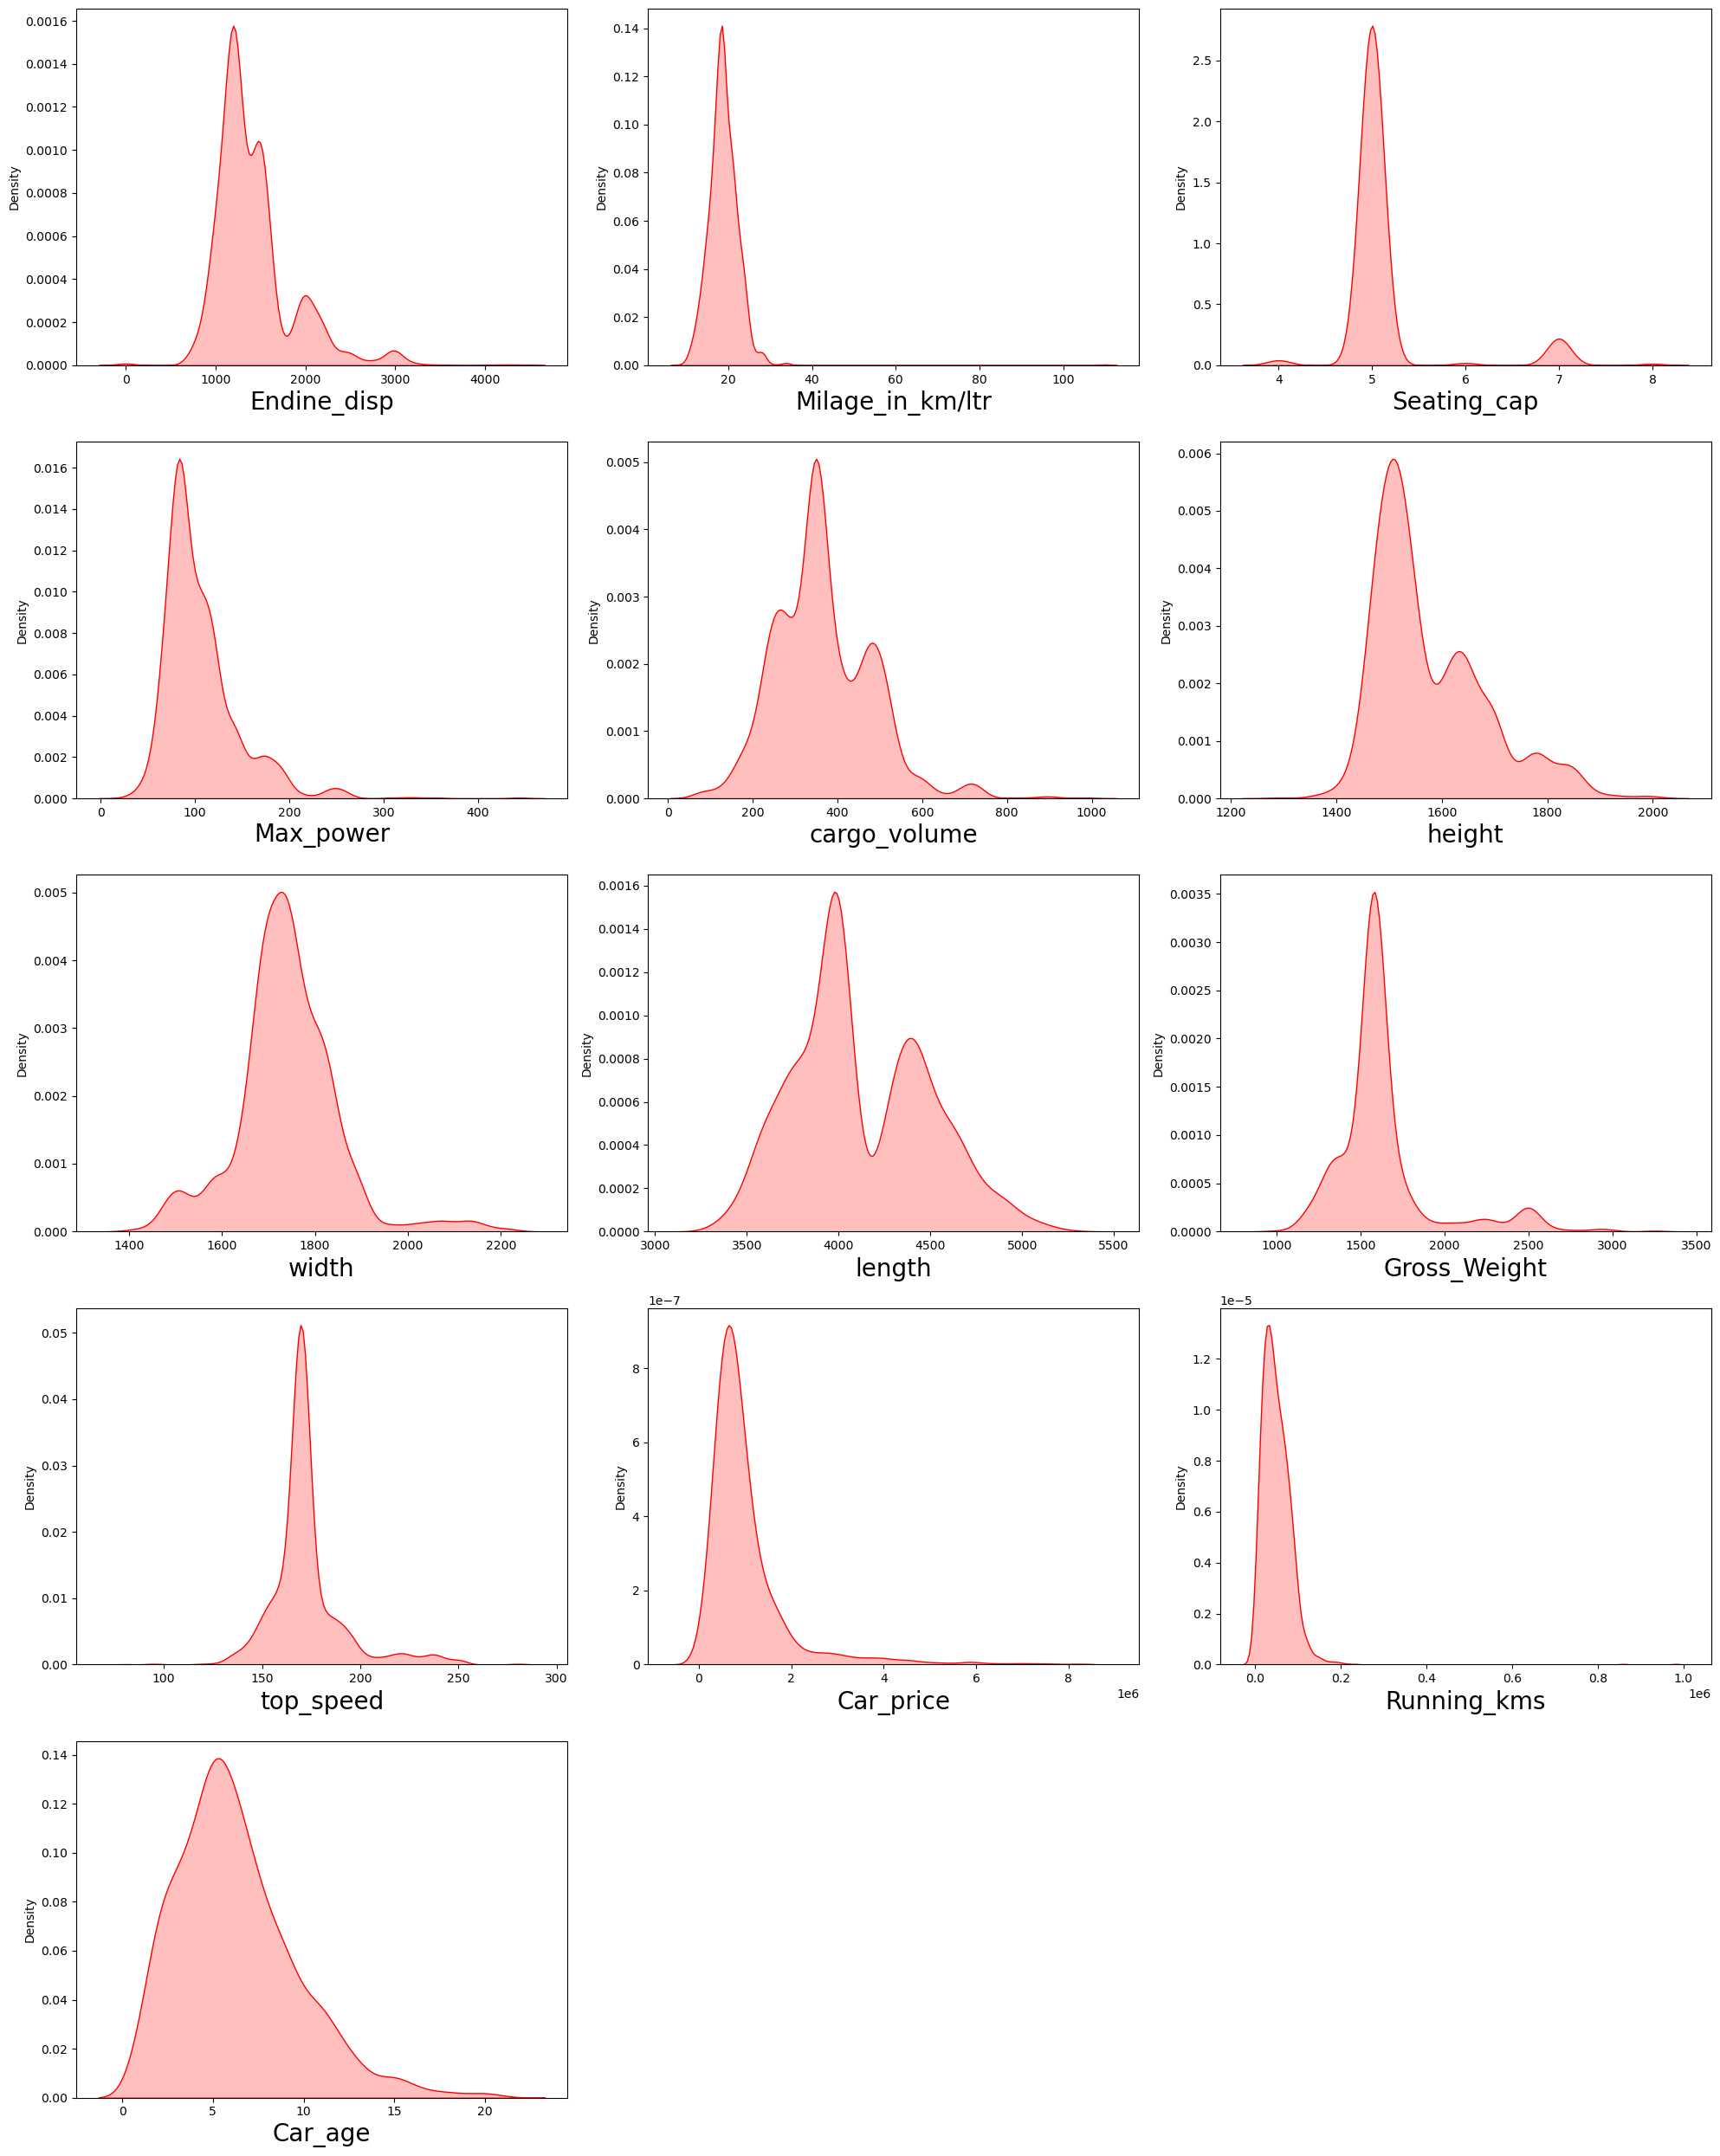

In [52]:
#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

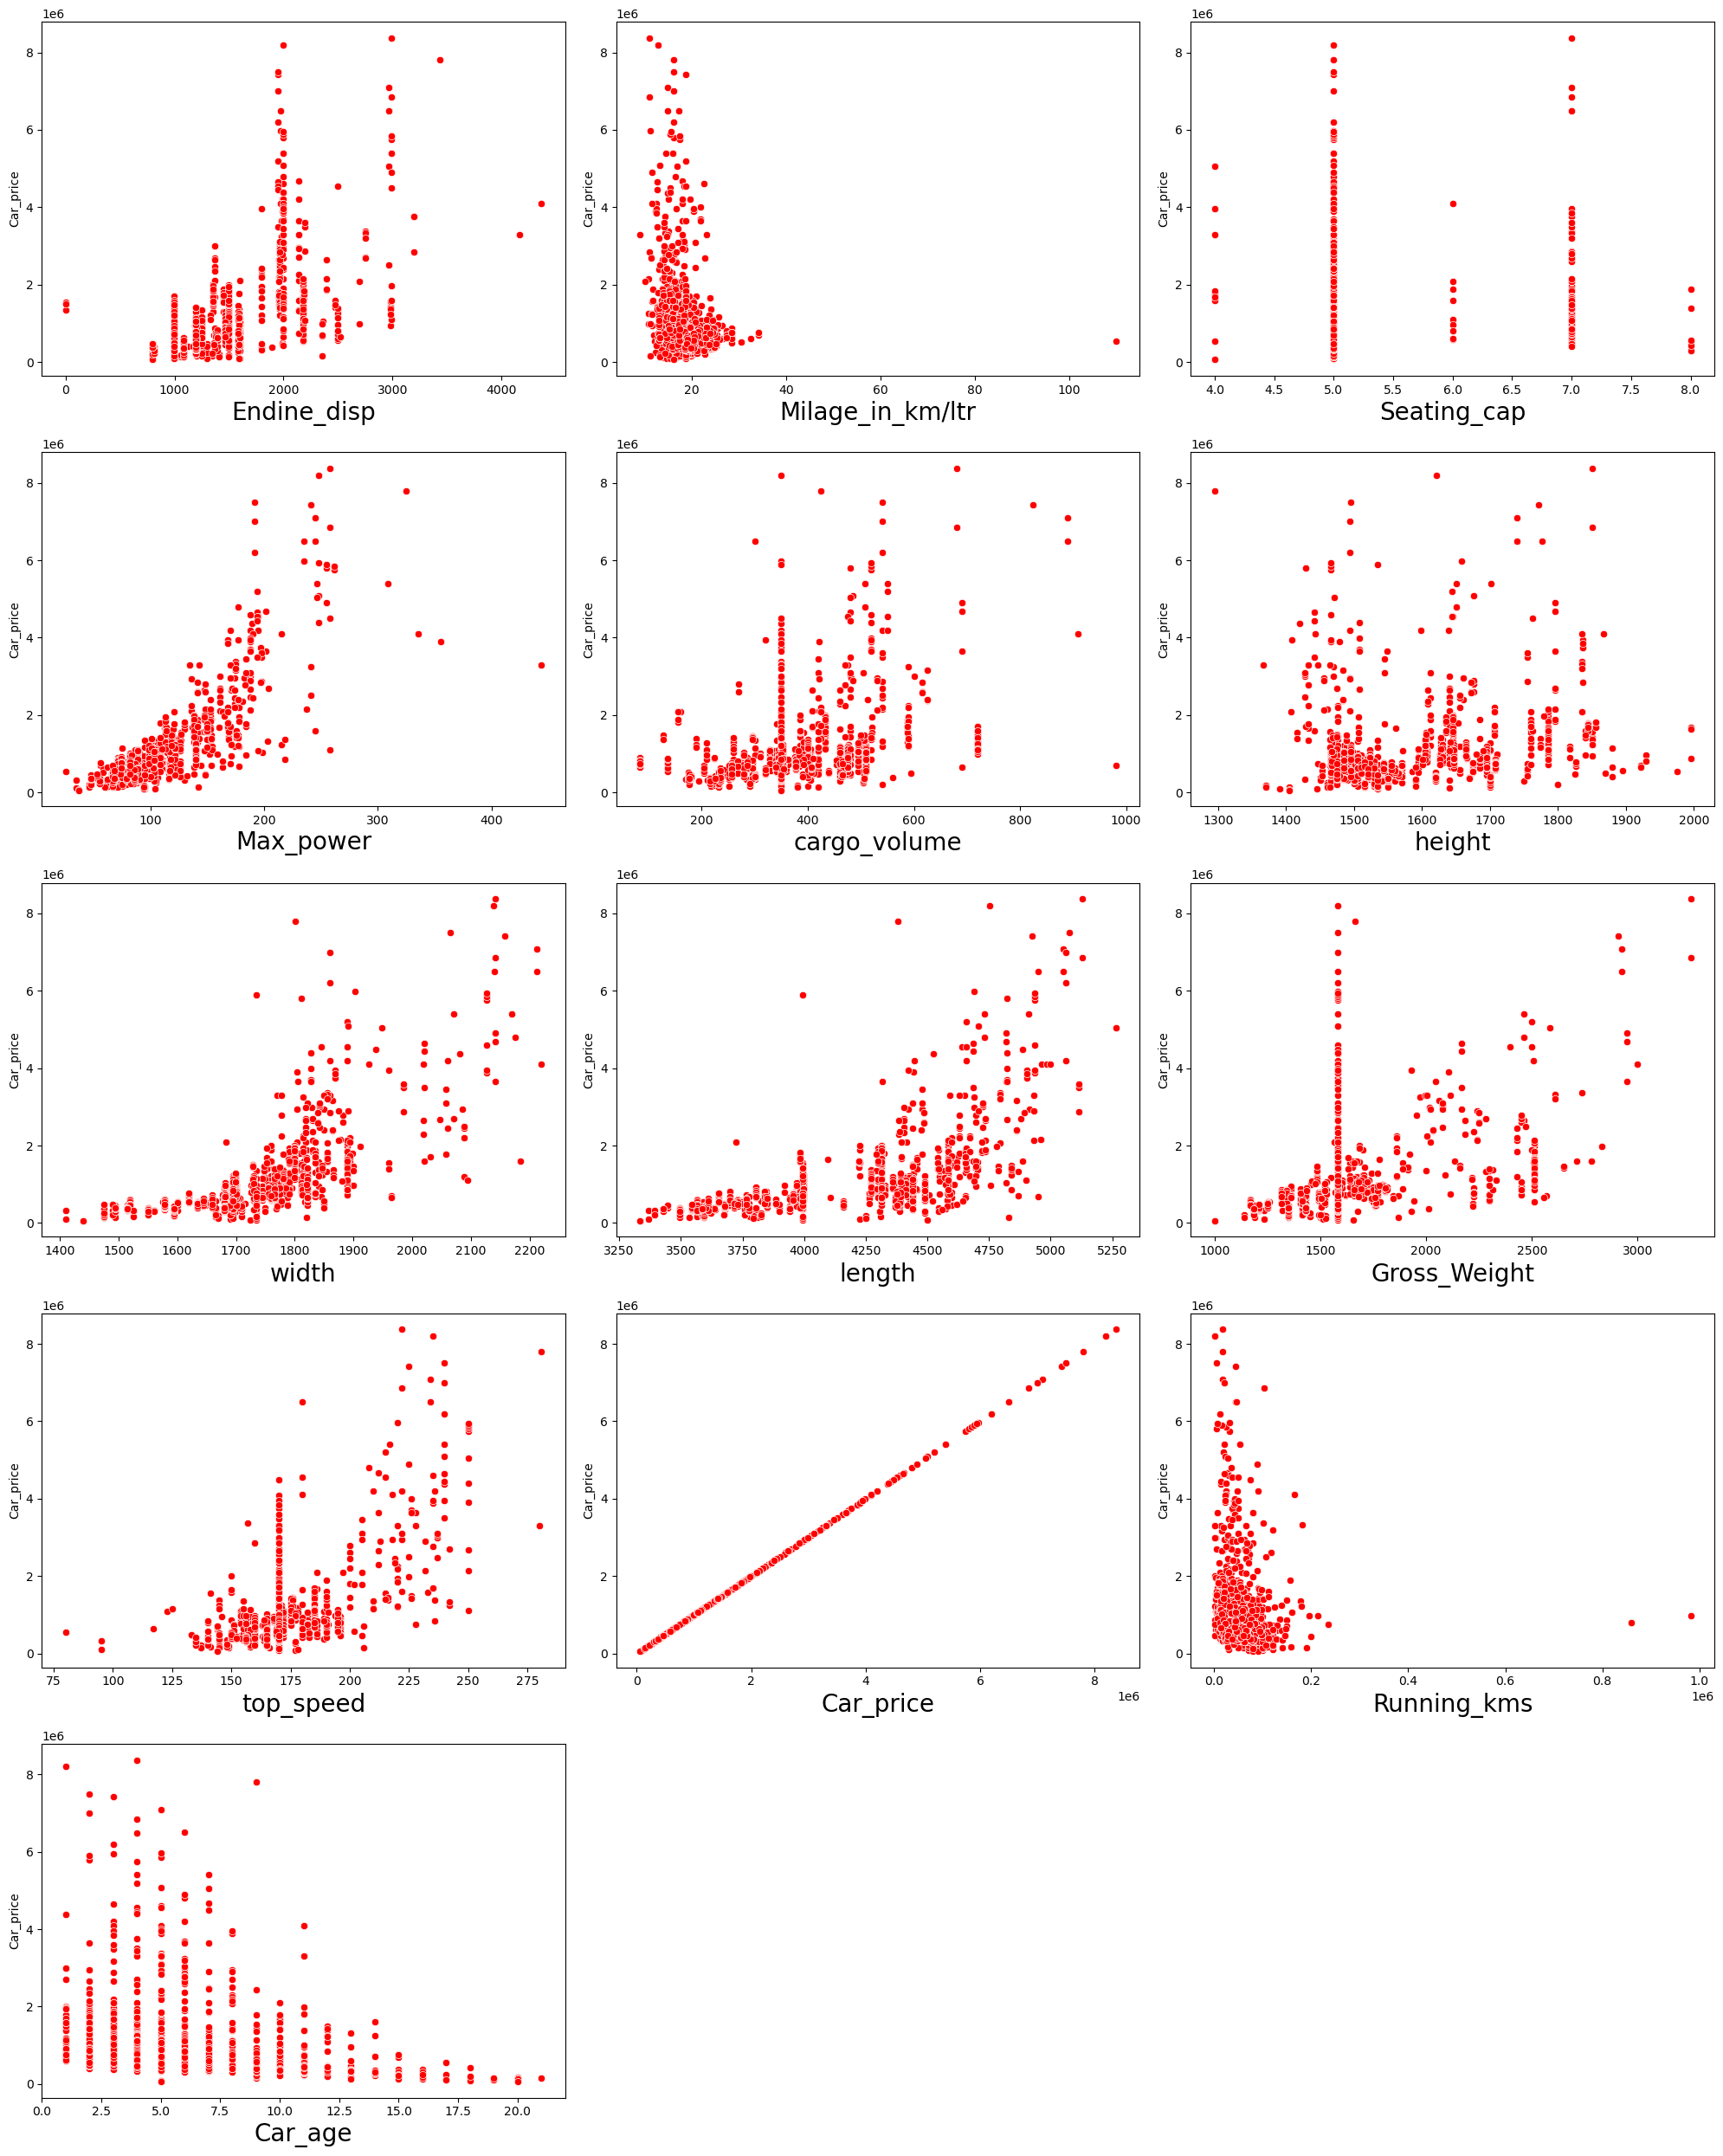

In [53]:
#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.scatterplot(num_data[column],num_data['Car_price'], color="red")
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [54]:
for col in ['Running_kms','Endine_disp','Milage_in_km/ltr','Max_power','height','width','length','Gross_Weight','top_speed']:
    percentile = df[col].quantile([0.01,0.98]).values
    df[col][df[col]<=percentile[0]]=percentile[0]
    df[col][df[col]>=percentile[1]]=percentile[1]

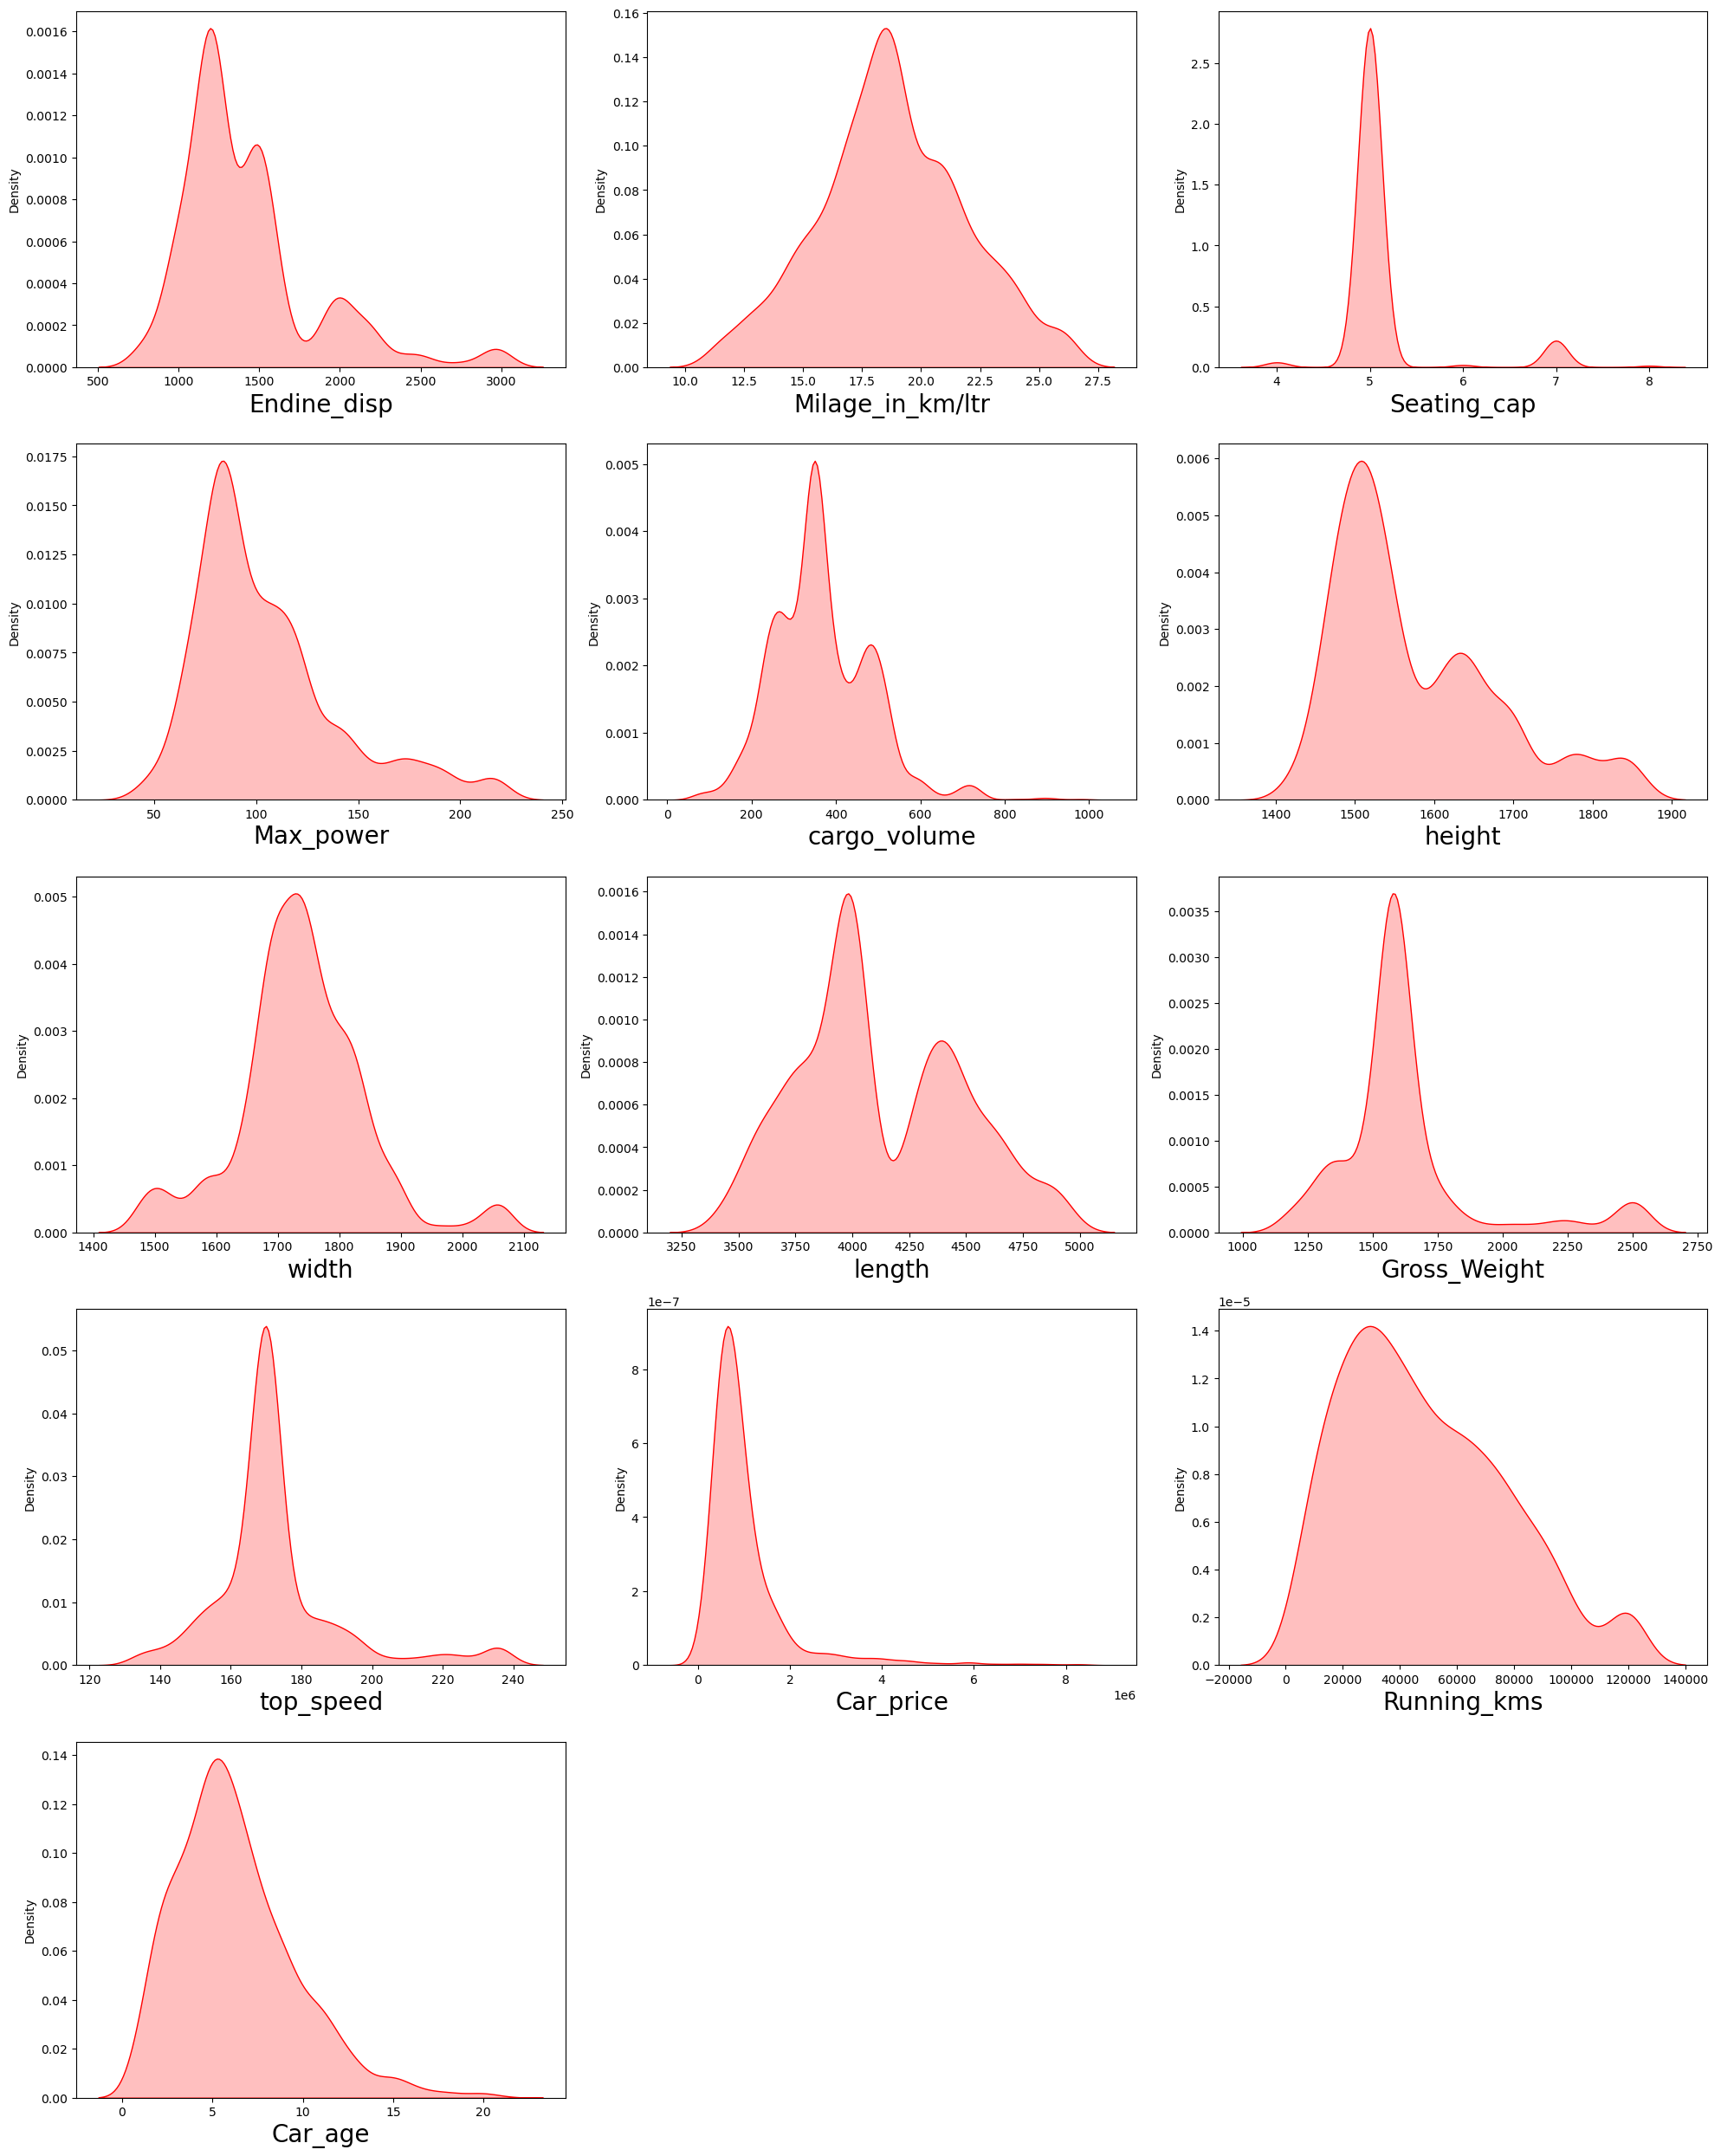

In [55]:
#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [56]:
df.to_csv('Clean_data')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Endine_disp,1536.0,1.423784e+03,421.119968,796.00,1197.00,1248.00,1498.00,2967.000
Milage_in_km/ltr,1536.0,1.878464e+01,3.106419,11.50,17.00,18.60,20.85,26.030
Seating_cap,1536.0,5.146484e+00,0.562707,4.00,5.00,5.00,5.00,8.000
Max_power,1536.0,1.050511e+02,35.677642,47.33,81.83,94.68,120.00,215.907
cargo_volume,1536.0,3.651803e+02,113.363544,84.00,285.00,350.00,433.00,981.000
height,1536.0,1.576674e+03,102.942281,1427.00,1500.00,1535.00,1643.00,1845.800
width,1536.0,1.737834e+03,103.768019,1480.25,1694.00,1735.00,1800.00,2060.000
length,1536.0,4.117828e+03,358.407219,3445.00,3845.00,3995.00,4413.00,4903.000
Gross_Weight,1536.0,1.626973e+03,278.303335,1185.00,1580.00,1580.00,1580.00,2510.000
top_speed,1536.0,1.726354e+02,17.998477,135.00,168.00,170.00,172.00,236.000


In [57]:
X = df.drop(columns=['Car_price'], axis=1)
y = df['Car_price']

In [58]:
X.skew()

Endine_disp         1.575806
Milage_in_km/ltr    0.076588
Seating_cap         2.945641
Max_power           1.221981
cargo_volume        0.764492
height              0.974775
width               0.302203
length              0.315262
Gross_Weight        1.839853
top_speed           1.548413
Running_kms         0.583902
Car_age             0.974173
dtype: float64

In [59]:
class skewness_remove:
  def __init__(self,skew=0.5):
    self.skew=skew
  
  def fit(self,X,y=None):
    return self

  def transform(self,X):
    x=X.copy()
    X_num=X.select_dtypes(exclude='object')
    skewness=X_num.apply(lambda x:x.skew())
    skewness_col=skewness[abs(skewness)>=self.skew].index
    X[skewness_col]=power_transform(X[skewness_col])
    return X

In [60]:
sk = skewness_remove()
sk.fit(X)
# Save the encoder object using pickle
with open('skew.pkl', 'wb') as f:
    pickle.dump(sk, f)
sk.transform(X)

,Endine_disp,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,...,Gross_Weight,top_speed,Ownership,Steering_Type,Brand,Model,Running_kms,Fuel_type,Gear_Transmission,Car_age
0,0.345908,13.96,-0.149788,Black,1.113324,Disc,Disc,1.792776,1.693090e-15,1835.0,...,0.031262,-0.008078,Second Owner,Power,mg,hector sharp dct,-1.461104,Petrol,Automatic,-1.042068
1,-1.359734,19.17,-0.149788,Silver,-1.136832,Disc,Drum,0.428992,4.718448e-16,1750.0,...,0.031262,-0.008078,First Owner,Electric,renault,kiger rxz,-1.514185,Petrol,Manual,-1.567058
2,-0.455739,18.60,-0.149788,Grey,-0.433373,Ventilated Disc,Drum,-1.241750,-3.885781e-16,1695.0,...,-0.883606,-0.718119,First Owner,Power,maruti,swift vxi,-0.476014,Petrol,Manual,1.131781
3,0.371823,19.87,-0.149788,Grey,0.346529,Disc,Drum,0.987622,1.249001e-15,1822.0,...,0.807914,-0.139591,First Owner,Power,renault,duster 110ps diesel rxs amt,-0.095689,Diesel,Automatic,-0.235590
4,-0.455739,18.90,-0.149788,Silver,-0.601732,Disc,Drum,-0.975626,-4.996004e-16,1660.0,...,0.031262,-0.346289,First Owner,Power,hyundai,grand i10 1.2 kappa sportz bsiv,-0.715943,Petrol,Manual,0.092921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,-0.455739,17.19,-0.149788,White,-0.601732,Disc,Drum,-0.672029,-8.326673e-17,1760.0,...,0.031262,-0.718119,First Owner,Power,hyundai,i20 active 1.2 s,-0.070876,Petrol,Manual,0.092921
1532,-2.721594,25.17,-0.149788,White,-2.344199,Disc,Drum,-0.733374,-1.193490e-15,1579.0,...,0.031262,-0.008078,First Owner,Power,renault,kwid rxt bsiv,0.541270,Petrol,Manual,-0.608276
1533,1.638991,13.01,2.646497,White,1.916306,Ventilated Disc,Disc,0.233767,1.221245e-15,1880.0,...,0.031262,0.688645,First Owner,Power,hyundai,santa fe 2wd at,1.994373,Diesel,Automatic,0.656159
1534,1.343534,16.65,-0.149788,White,1.113324,Disc,Disc,1.980299,1.082467e-15,1839.0,...,1.911664,-0.008078,First Owner,Electric,volkswagen,tiguan 2.0 tdi highline,0.724495,Diesel,Automatic,-0.235590


In [61]:
X.skew()

Endine_disp        -0.000190
Milage_in_km/ltr    0.076588
Seating_cap        -0.992567
Max_power           0.007208
cargo_volume        0.037981
height              0.000000
width               0.302203
length              0.315262
Gross_Weight       -0.101241
top_speed          -0.120693
Running_kms        -0.077018
Car_age            -0.008107
dtype: float64

<AxesSubplot:xlabel='Endine_disp', ylabel='Density'>

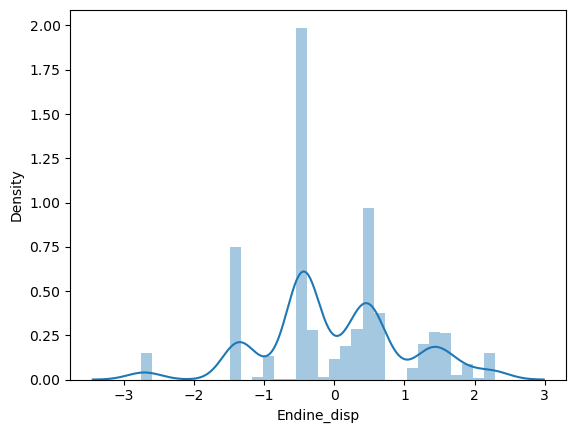

In [62]:
sns.distplot(X.Endine_disp)

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Endine_disp        1536 non-null   float64
 1   Milage_in_km/ltr   1536 non-null   float64
 2   Seating_cap        1536 non-null   float64
 3   color              1536 non-null   object 
 4   Max_power          1536 non-null   float64
 5   front_brake_type   1536 non-null   object 
 6   rear_brake_type    1536 non-null   object 
 7   cargo_volume       1536 non-null   float64
 8   height             1536 non-null   float64
 9   width              1536 non-null   float64
 10  length             1536 non-null   float64
 11  Gross_Weight       1536 non-null   float64
 12  top_speed          1536 non-null   float64
 13  Ownership          1536 non-null   object 
 14  Steering_Type      1536 non-null   object 
 15  Brand              1536 non-null   object 
 16  Model              1536 

In [64]:
class Encoding:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    le=LabelEncoder()
    cols= ['color', 'front_brake_type', 'rear_brake_type', 'Ownership', 'Steering_Type',
       'Brand', 'Model', 'Fuel_type', 'Gear_Transmission']
    for c in cols:
      X[c]=le.fit_transform(X[c])
      X[c]
    return X

In [65]:
enc = Encoding()
enc.fit(X)
# Save the encoder object using pickle
with open('encoder.pkl', 'wb') as f:
    pickle.dump(enc, f)
enc.transform(X)

,Endine_disp,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,...,Gross_Weight,top_speed,Ownership,Steering_Type,Brand,Model,Running_kms,Fuel_type,Gear_Transmission,Car_age
0,0.345908,13.96,-0.149788,1,1.113324,0,1,1.792776,1.693090e-15,1835.0,...,0.031262,-0.008078,2,5,16,340,-1.461104,4,0,-1.042068
1,-1.359734,19.17,-0.149788,25,-1.136832,0,2,0.428992,4.718448e-16,1750.0,...,0.031262,-0.008078,0,1,21,422,-1.514185,4,1,-1.567058
2,-0.455739,18.60,-0.149788,15,-0.433373,3,2,-1.241750,-3.885781e-16,1695.0,...,-0.883606,-0.718119,0,5,14,626,-0.476014,4,1,1.131781
3,0.371823,19.87,-0.149788,15,0.346529,0,2,0.987622,1.249001e-15,1822.0,...,0.807914,-0.139591,0,5,21,208,-0.095689,1,0,-0.235590
4,-0.455739,18.90,-0.149788,25,-0.601732,0,2,-0.975626,-4.996004e-16,1660.0,...,0.031262,-0.346289,0,5,7,317,-0.715943,4,1,0.092921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,-0.455739,17.19,-0.149788,31,-0.601732,0,2,-0.672029,-8.326673e-17,1760.0,...,0.031262,-0.718119,0,5,7,365,-0.070876,4,1,0.092921
1532,-2.721594,25.17,-0.149788,31,-2.344199,0,2,-0.733374,-1.193490e-15,1579.0,...,0.031262,-0.008078,0,5,21,454,0.541270,4,1,-0.608276
1533,1.638991,13.01,2.646497,31,1.916306,3,1,0.233767,1.221245e-15,1880.0,...,0.031262,0.688645,0,5,7,544,1.994373,1,0,0.656159
1534,1.343534,16.65,-0.149788,31,1.113324,0,1,1.980299,1.082467e-15,1839.0,...,1.911664,-0.008078,0,1,25,660,0.724495,1,0,-0.235590


In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Endine_disp        1536 non-null   float64
 1   Milage_in_km/ltr   1536 non-null   float64
 2   Seating_cap        1536 non-null   float64
 3   color              1536 non-null   int32  
 4   Max_power          1536 non-null   float64
 5   front_brake_type   1536 non-null   int32  
 6   rear_brake_type    1536 non-null   int32  
 7   cargo_volume       1536 non-null   float64
 8   height             1536 non-null   float64
 9   width              1536 non-null   float64
 10  length             1536 non-null   float64
 11  Gross_Weight       1536 non-null   float64
 12  top_speed          1536 non-null   float64
 13  Ownership          1536 non-null   int32  
 14  Steering_Type      1536 non-null   int32  
 15  Brand              1536 non-null   int32  
 16  Model              1536 

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [68]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to x_train and transform both x_train and x_test
scaler_ = scaler.fit(X_train)
# Save the encoder object using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler_, f)
X_train = scaler_.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
models={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "Lasso":Lasso(),
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "LGBMRegressor":LGBMRegressor()
}

************************************************ LinearRegression *****************************************************
MEAN SQUARED ERROR 378192098337.2252
MEAN ABSOLUTE ERROR 360917.97311636125
R2_SCORE 0.5820495983476575
CVS_SCORE 0.6075270026340913
Diff :  -0.025477404286433858


RMSE 614973.250098917


MODEL PERFORMANCE CURVE


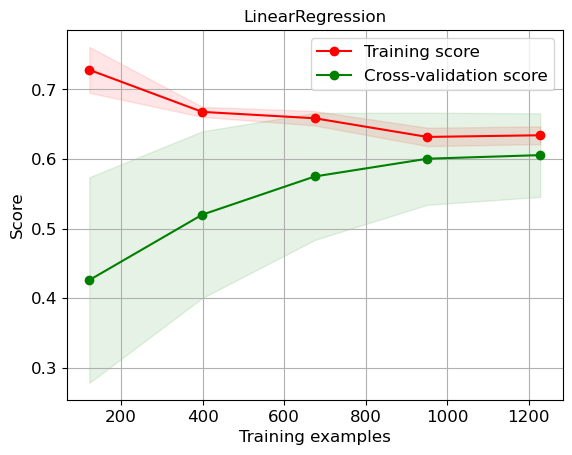

************************************************ DecisionTreeRegressor *****************************************************
MEAN SQUARED ERROR 113034161605.20607
MEAN ABSOLUTE ERROR 143963.12364425164
R2_SCORE 0.8750828654246328
CVS_SCORE 0.8107044859939613
Diff :  0.06437837943067148


RMSE 336205.53476289776


MODEL PERFORMANCE CURVE


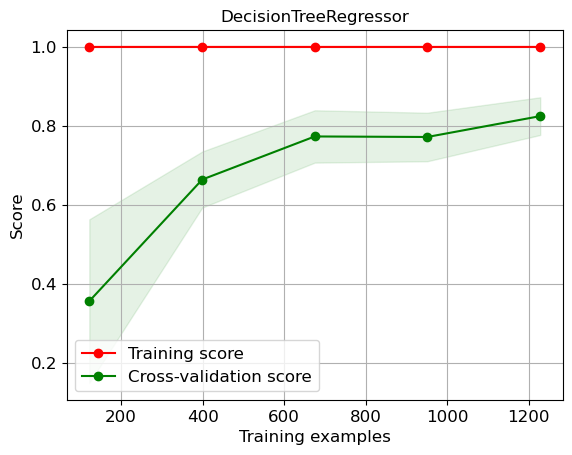

************************************************ RandomForestRegressor *****************************************************
MEAN SQUARED ERROR 88087627161.42143
MEAN ABSOLUTE ERROR 119913.37671728128
R2_SCORE 0.9026519609622048
CVS_SCORE 0.9020106148114305
Diff :  0.000641346150774269


RMSE 296795.59828511847


MODEL PERFORMANCE CURVE


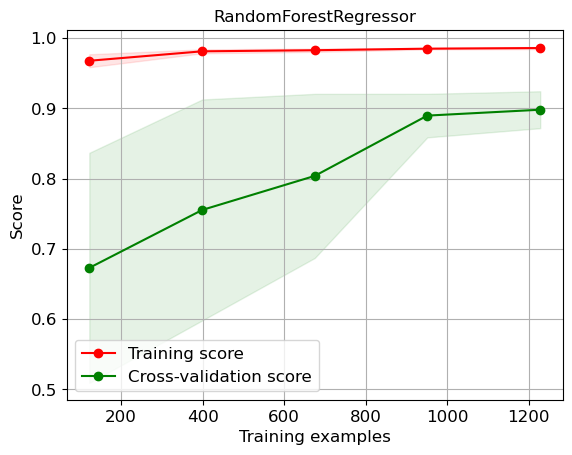

************************************************ Lasso *****************************************************
MEAN SQUARED ERROR 378192057735.7765
MEAN ABSOLUTE ERROR 360917.3747605768
R2_SCORE 0.5820496432174256
CVS_SCORE 0.6065958419414403
Diff :  -0.024546198724014756


RMSE 614973.2170881724


MODEL PERFORMANCE CURVE


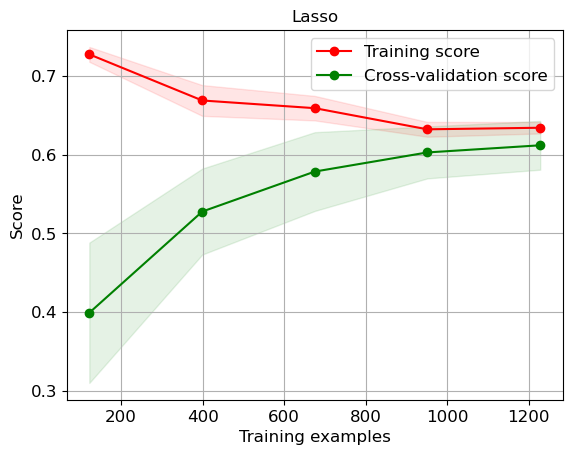

************************************************ ExtraTreesRegressor *****************************************************
MEAN SQUARED ERROR 65200946730.31454
MEAN ABSOLUTE ERROR 109435.17353579176
R2_SCORE 0.927944655655526
CVS_SCORE 0.9086764722734262
Diff :  0.01926818338209979


RMSE 255344.76053037497


MODEL PERFORMANCE CURVE


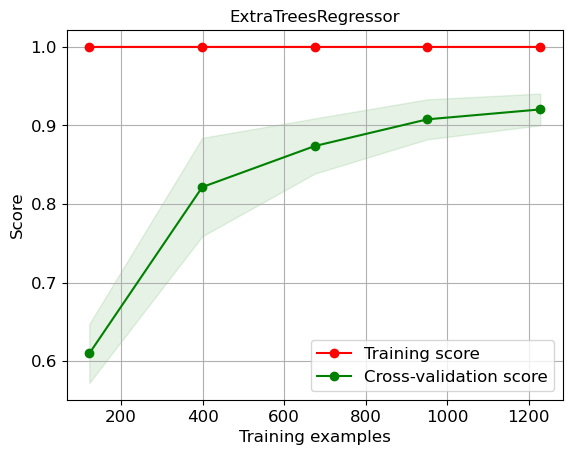

************************************************ LGBMRegressor *****************************************************
MEAN SQUARED ERROR 78299820707.40192
MEAN ABSOLUTE ERROR 111612.6709639897
R2_SCORE 0.9134687328004815
CVS_SCORE 0.8650705858541003
Diff :  0.048398146946381115


RMSE 279821.0512227447


MODEL PERFORMANCE CURVE


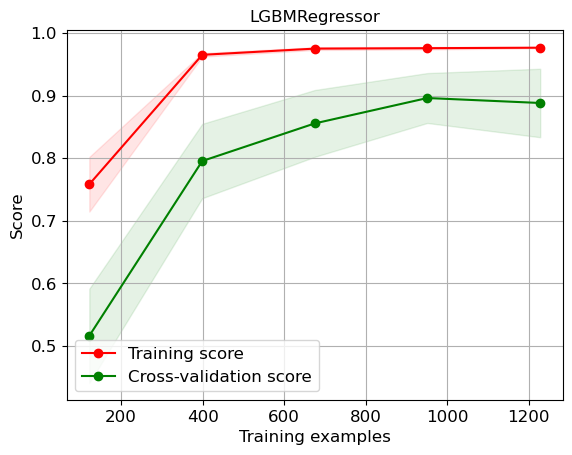

In [74]:

CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
NAME=[]
kf=KFold(n_splits=5,shuffle=True)
for name, model in models.items():
  print("************************************************",name,"*****************************************************")
  NAME.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("MEAN SQUARED ERROR",mse)
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print("MEAN ABSOLUTE ERROR",mae)
  cvs=cross_val_score(model,X,y,scoring='r2',cv=kf).mean()
  CVS.append(cvs)
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print("R2_SCORE",r2)
  print("CVS_SCORE",cvs)
  print("Diff : ", r2-cvs)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print('\n')
  print("RMSE",rmse)
  print('\n')
  print('MODEL PERFORMANCE CURVE')
  skplt.estimators.plot_learning_curve(model,X,y,cv=kf,scoring='r2',title=name,text_fontsize='large')
  plt.show()

## Final Model

In [76]:
#lets train and test our final model with best parameters
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 110440.45553145336
RMSE : 260011.96803049074
------------------------------
 
r2 Score: 92.5286518681292 %


In [77]:
import joblib
joblib.dump(model,"UsedCar_price_prediction.pkl")

['UsedCar_price_prediction.pkl']